
# Sprint 2: Data Analysis and Visualization

> NB! Use `pip install -e .` for local development.

## Goal
Analyze and visualize the relationships between energy production and weather data.

## Tasks

### 1. Time Series of Energy Changes
- Visualize the changes in wind speed and produced energy over the course of a day and a week.

### 2. Analysis of Weather Impact
- Provide an overview of how air temperature, humidity, cloudiness, and solar radiation affect energy production.

### 3. Identifying High and Low Production Periods
- Find and describe periods where production is significantly above or below average.

### 4. Analysis of Zone and Seasonal Effects
- Explore how wind energy production varies by season and climatic zones.

### 5. Report Compilation
- Create a summary of the identified patterns and include visualizations.


## Time Series of Energy Changes

### Goal
Visualize the changes in wind speed and produced energy over the course of:
- A single day (in hours)
- A week (in days)

This helps to identify daily and weekly patterns in wind behavior and energy production.

---

### Relevant Columns

- `Wind_Speed`: Raw wind speed (likely in m/s or km/h)
- `Power_Output`: Energy produced (could be in kWh or another unit)
- `Hour_of_Day`: Integer from 0–23 (used for daily analysis)
- `Day_of_Week`: Integer or string (used for weekly patterns)
- `Timestamp`: Full datetime, optional if granular patterns needed

---

### Visualization Tools

We can use:
- `Seaborn` for quick static visuals
- `Plotly` for interactive exploration

---

### Solution

#### 1. **Daily Pattern**
Use `Hour_of_Day` to group and analyze behavior across typical days.

##### a. Wind Speed vs Hour
- Use `sns.lineplot()` or `px.line()` to show mean wind speed per hour.
- Add error bars (std deviation or shaded area) to show fluctuation.

##### b. Power Output vs Hour
- Same as above but with `Power_Output`.
- Optionally show `Wind_Speed` and `Power_Output` on twin y-axes for comparison.


In [3]:
# Handle the configuration and the path
# CODE DUPLICATION WARNING!
from config_loader import load_config
import os
import pathlib
from pprint import pprint

# get curr dir
current_dir = os.getcwd()

# find the root using patlihb
root_dir = pathlib.Path(current_dir).parents[0].resolve()

# path to the config
config_path = (root_dir / "tomodachi_core" / "config_development" / "config.py").resolve()

# load the config
config = load_config(config_path)

# Grab the CSV_PATH
CSV_PATH = config.SAVE_TO_PATH

# Finally, we have to combine the path
CSV_PATH = (root_dir / CSV_PATH).resolve()

Path C:\Users\Lenovo\Desktop\python_app\tuuleenergia_tomodachi exists.


### Import the tomodachi & load data

In [ ]:
from tomodachi_core.tomodachi.services import PandasService, DatetimeService
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

service = PandasService(str(CSV_PATH))

with service.connection() as df:
    datetime_service = DatetimeService(df)
    df = datetime_service.fix_dates_format()
    df = datetime_service.change_to_timestamp("Timestamp")

    # update the dataframe
    service.update_dataframe(df)

df = service.df


INFO:root:Finished working with data from C:\Users\Lenovo\Desktop\python_app\tuuleenergia_tomodachi\shared\data\processed\cleaned_Synthetic_Wind_Power.csv


### Daily variation in wind speed and power output:

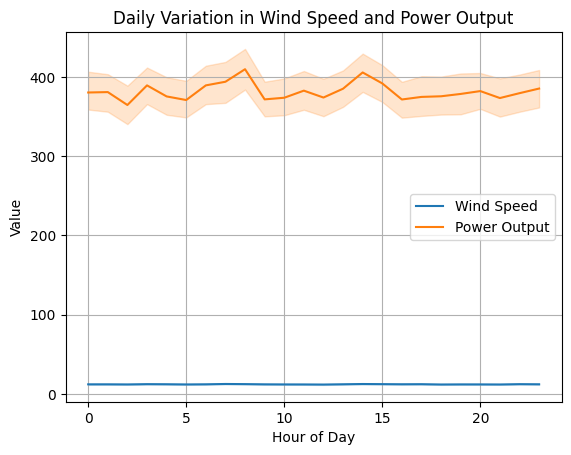

In [3]:
sns.lineplot(data=df, x='Hour_of_Day', y='Wind_Speed', label='Wind Speed')
sns.lineplot(data=df, x='Hour_of_Day', y='Power_Output', label='Power Output')
plt.title('Daily Variation in Wind Speed and Power Output')
plt.xlabel('Hour of Day')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

### Analysis:

- Seaborn (graph above): Wind speed is the constant. However, the wind speed is fluctuated. 

- Plotly (graph below): Wind speed appears to be relatively stable throughout the day with moderate fluctuations.

Power output shows higher variability, with noticeable peaks and dips. This could be due to external factors affecting turbine efficiency—possibly maintenance schedules, wind direction, or system optimizations.

### Using plotly for the same graph:

In [4]:
import plotly.express as px

fig = px.line(df, x="Hour_of_Day", y=["Wind_Speed", "Power_Output"], 
              title="Daily Variation of Wind Speed & Power Output")
fig.show()

### Weekly pattern:

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2312\3508431191.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0.5, 1.0, 'Average Power Output per Day of the Week')

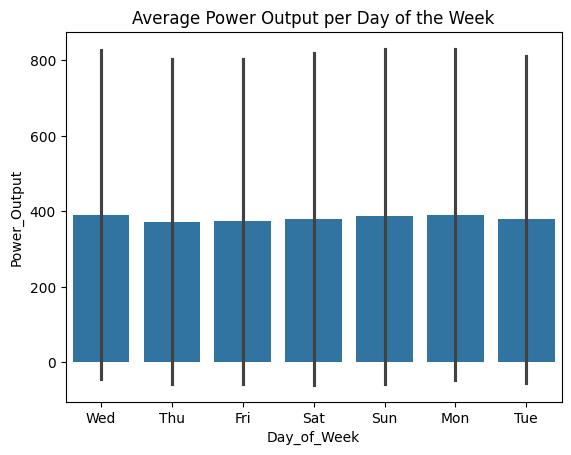

In [5]:
df['Day_of_Week'] = df['Day_of_Week'].map({
    0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'
})

sns.barplot(data=df, x='Day_of_Week', y='Power_Output', ci='sd')
plt.title('Average Power Output per Day of the Week')

### Analysis (Day of Week vs Power output | wind speed)

#### Graph reading:

The x-axis represents the days of the week, spanning from Wednesday to Tuesday.

The y-axis shows the average power output, ranging from 0 to 800. This suggests you're analyzing trends to see if certain days have higher or lower energy generation.

The heights of the bars are fairly consistent, hovering close to the 400 mark. This indicates that there isn't a dramatic difference in power output across the days.

#### Comparison with the Previous Graph

Unlike the previous graph, which broke down wind and power dynamics within specific hours of the day, this graph provides insights into weekly trends. While the daily variations were more pronounced in the hourly graph, here the output appears consistent. This could mean:

Environmental factors affecting power output, like wind speed and humidity, are relatively stable throughout the week.

Maintenance or operational schedules might be evenly distributed across the days.

### Graph Below (plotly)

X-Axis (Days of the Week): The graph spans from Friday to Wednesday, showing averages for each day.

Y-Axis (Values): This axis ranges from 0 to 400, representing the measured values of wind speed (blue line) and power output (red line).

#### Key Insights:

Wind Speed (Blue Line): The values for wind speed seem close to zero throughout the week, suggesting relatively calm or low wind conditions during the observed period. This would typically result in less variability in power generation.

Power Output (Red Line): Power output appears stable and consistent around the 400 mark, despite the minimal wind speeds. This could indicate that the turbines are operating efficiently under these low wind conditions, or that external factors (e.g., stored energy or system adjustments) are helping maintain consistent power levels.

#### Comparison to the Previous Graph:

This graph does complement your earlier day-of-week bar chart, but with the added dimension of showing wind speed alongside power output. It reinforces the idea that power output remains steady across the week, while wind speed shows little impact during the same time period.

### Using Plotly:

In [6]:
fig = px.line(df.groupby('Day_of_Week')[['Wind_Speed', 'Power_Output']].mean().reset_index(),
              x='Day_of_Week', y=['Wind_Speed', 'Power_Output'],
              title='Weekly Average Wind Speed and Power Output')
fig.show()

## Semen: Analysis of Weather pattern

### Power Output:

Correlates minimally with all other variables, showing almost no significant relationship (values close to 0).

This suggests that other factors beyond these variables (like wind speed or system-specific conditions) play a larger role in determining power output.

### Temperature and Humidity:

A moderately strong negative correlation (-0.46) exists between these two. This aligns with the general atmospheric behavior—higher temperatures often lead to lower humidity levels.

### Other Variables:

Correlation values between Cloud Cover, Solar Radiation, and other features are very close to zero, indicating weak or negligible relationships.

In [ ]:
semen_df = df[['Power_Output', 'Temperature', 'Humidity', 'Cloud_Cover', 'Solar_Radiation']].copy()
semen_df[['Power_Output', 'Temperature', 'Humidity', 'Cloud_Cover', 'Solar_Radiation']].corr()


,Power_Output,Temperature,Humidity,Cloud_Cover,Solar_Radiation
Power_Output,1.000000,0.000393,-0.007142,-0.006292,0.006815
Temperature,0.000393,1.000000,-0.463979,-0.003312,0.000124
Humidity,-0.007142,-0.463979,1.000000,-0.009336,0.002909
Cloud_Cover,-0.006292,-0.003312,-0.009336,1.000000,0.008360
Solar_Radiation,0.006815,0.000124,0.002909,0.008360,1.000000


## Obsevations:

### Graph 1 (Power Output vs Temperature)

Temperature (X-axis): Ranges from -30 to 30, suggesting a diverse dataset covering colder and warmer conditions.

Power Output (Y-axis): Ranges from -250 to 1750, showing variation in energy generation across different temperature settings.

Data Points (Blue Dots): These points are densely scattered, and there doesn't appear to be a clear trend. This implies that temperature alone might not be a strong predictor of power output.

Additionally, the red horizontal line around 500 likely represents a reference point—possibly an average or baseline value for power output. Despite the wide range of temperature values, most data points hover around this line, indicating relatively stable energy generation.

#### Insights:

The scatter suggests that while temperature is included in your analysis, other factors (such as wind speed or humidity) may play a bigger role in influencing power output.

The density of the points could mean there's noise or variability in the data that masks any straightforward relationship.


### Graph 2 (Power Output vs Humidity)

Humidity (X-axis): The values range from 40 to 90, representing varying levels of atmospheric moisture.

Power Output (Y-axis): The values span -250 to 1750, indicating fluctuating energy generation under different humidity conditions.

Data Points (Blue Dots): These points are scattered widely across the graph, suggesting a lack of strong correlation between humidity and power output. This aligns with your earlier findings from the correlation matrix, where humidity showed a negligible relationship with power output.

#### Insights:

Most points seem clustered near the red horizontal line (around 500), possibly denoting an average power output level. Despite changes in humidity, power output remains fairly stable.

The lack of a clear trend in the scatter plot reaffirms that humidity alone may not significantly affect power output, although it could interact with other features, such as wind speed or temperature.

### Graph 3 (Power Output vs Cloud Cover)

Cloud Cover (X-axis): The values range from 0 to 100, representing the percentage of cloud coverage in the atmosphere.

Power Output (Y-axis): The values span from -250 to 1750, indicating fluctuations in energy generation under different cloud cover conditions.

Data Points (Blue Dots): The points are scattered across the graph, with no distinct trend, suggesting that cloud cover may not have a strong or consistent impact on power output.

Red Horizontal Line: Positioned around 500, it likely serves as a reference point or average power output, helping to assess deviations.

#### Insights:

The scatter shows that cloud cover alone doesn't seem to have a clear relationship with power output, as the points are distributed quite randomly.

However, cloud cover might still influence power output indirectly, especially in combination with other factors like solar radiation or wind speed.


### Graph 4 (Power Output vs Solar Radiation)

Solar Radiation (X-axis): The values range from 0 to 1000, representing the amount of solar energy available during the observed period.

Power Output (Y-axis): Values span -250 to 1750, indicating fluctuations in energy generation.

Data Points (Blue Dots): The scatter is quite dense, with points dispersed across the graph. It seems that power output doesn't follow a clear trend with solar radiation.

Red Horizontal Line: Around 500, this might represent an average or baseline for power output, useful as a reference.

#### Insights:

Unlike solar power systems, where solar radiation directly impacts energy output, this graph suggests a weak relationship between solar radiation and power output for your wind energy system. This aligns with the idea that solar radiation might act as a background variable, not directly influencing wind energy generation.

Similar to previous scatter plots (Temperature, Humidity, Cloud Cover), power output remains relatively stable across varying levels of solar radiation, suggesting other factors—like wind speed or system efficiency—play larger roles.

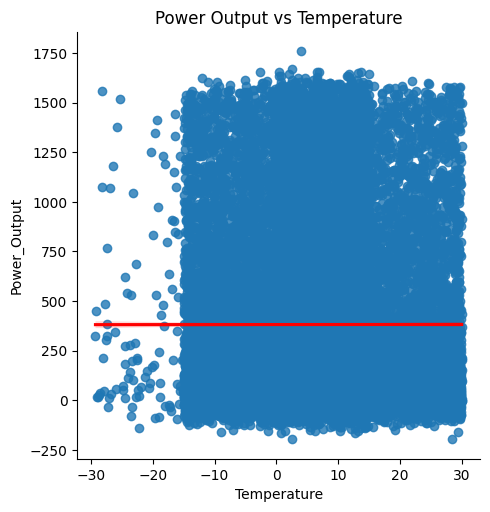

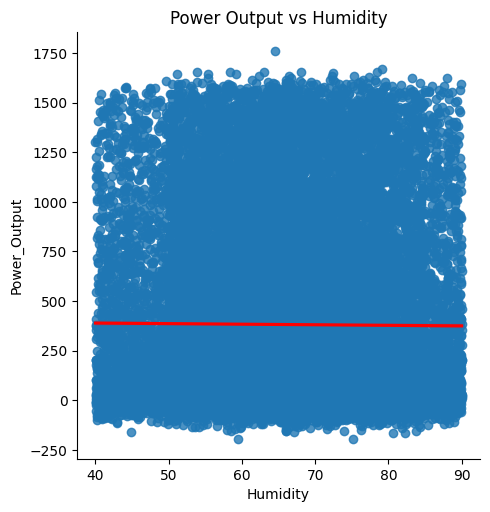

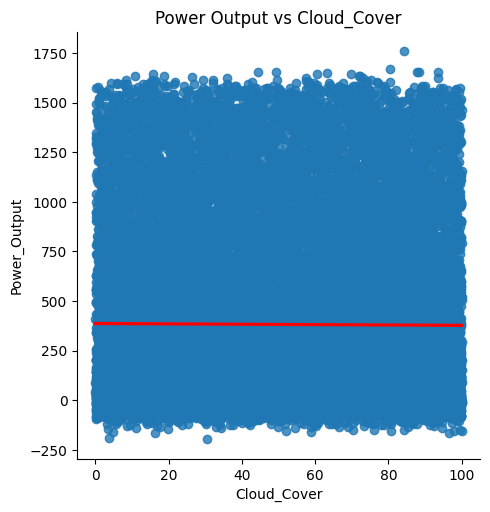

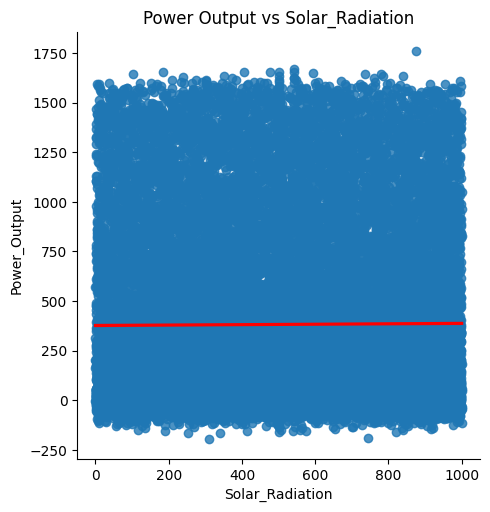

In [8]:
for col in ['Temperature', 'Humidity', 'Cloud_Cover', 'Solar_Radiation']:
    sns.lmplot(data=semen_df, x=col, y='Power_Output', line_kws={"color": "red"})
    plt.title(f'Power Output vs {col}')
    plt.show()


In [9]:
semen_df.groupby(pd.qcut(semen_df['Solar_Radiation'], q=4))['Power_Output'].mean()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2312\1395555389.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Solar_Radiation
(0.0177, 263.221]     375.993340
(263.221, 500.489]    384.461395
(500.489, 736.997]    382.420163
(736.997, 999.928]    383.297510
Name: Power_Output, dtype: float64

<Axes: >

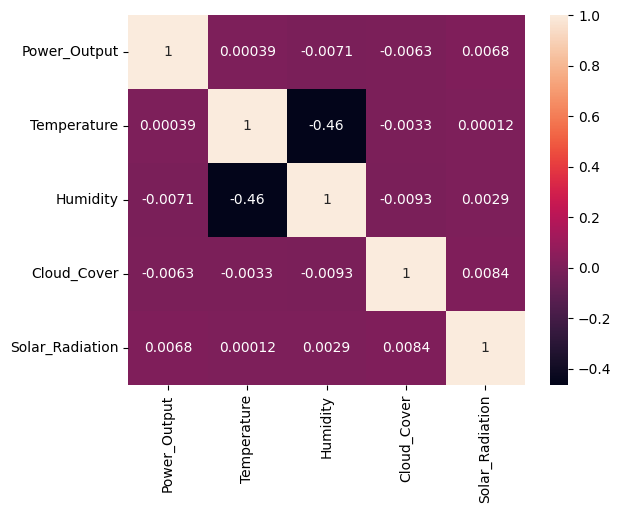

In [10]:
sns.heatmap(semen_df[['Power_Output', 'Temperature', 'Humidity', 'Cloud_Cover', 'Solar_Radiation']].corr(), annot=True)


## Alexander: High & Low (Task nr 3)

In [11]:
from tomodachi_core.tomodachi.services.high_low_profit_service import HighLowProfit
high_low_profit_service = HighLowProfit(df) # this copies the dataframe

# run the analysis
high_low_profit_service.calculate_statistics('Power_Output')
high_low_profit_service.classify_data('Power_Output')
high_low_profit_service.find_periods()

# print information
high_low_profit_service.print_info()




        Mean Output: 381.59379238606493

        Std Output: 436.0137663702973

        High Threshold: 817.6075587563622

        Low Threshold: -54.41997398423234



## Before we continue: Analysis

### Key Metrics:

#### Mean Output (381.59):

This is the average power output across your dataset. It aligns with your earlier observations, where power output hovered around the 400 mark in several scatter plots.

The mean provides a baseline for understanding what constitutes "typical" power output.

#### Standard Deviation (436.01):

This measures how much variation exists in power output. A large standard deviation indicates high variability, which we also observed in your scatter plots (especially with seemingly random data distribution around the horizontal average line).

#### High Threshold (817.61):

This value represents the cutoff for "high" power output levels. Periods exceeding this threshold are likely times of optimal or above-average energy generation. Factors like strong wind speeds or ideal turbine performance might coincide with these periods.

#### Low Threshold (-54.42):

This represents the cutoff for "low" power output levels. Periods below this threshold likely indicate minimal or no energy generation. This could happen during calm weather, turbine shutdowns, or maintenance periods.

### Relationship to Graphs:

#### Scatter Plots: 

The thresholds provide context to classify the seemingly scattered data points. For example, values above 817.61 (high output) and below -54.42 (low output) could now be highlighted in the plots for better clarity.

#### Weekly/Daily Variations:

Periods classified as "high" or "low" can be mapped to specific days of the week or hours of the day, potentially revealing patterns (e.g., high output mostly occurs on windy weekdays).

#### Correlation Analysis: 

Factors like temperature, humidity, cloud cover, and solar radiation, which showed weak direct correlations with power output, could now be revisited with these thresholds to assess their impact during high/low periods.

In [12]:
copied_df = high_low_profit_service._df # re-factor later on
copied_df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')
print(copied_df.head())

            Timestamp  Wind_Speed  Wind_Gust  Wind_Direction  Temperature  \
0 2020-01-01 00:00:00    0.265077   4.876651             274     2.152885   
1 2020-01-01 01:00:00   10.727089  13.030088             232    -9.783598   
2 2020-01-01 02:00:00   16.280163  17.651853             175     2.125048   
3 2020-01-01 03:00:00    5.110434   9.387124             235    -0.174307   
4 2020-01-01 04:00:00   16.444265  20.349305               1     1.881483   

    Humidity  Precipitation     Pressure  Cloud_Cover  Solar_Radiation  \
0  88.345267       8.519070   997.887007    18.112024       359.985040   
1  70.172549       0.604355  1021.258081    76.901148       414.169416   
2  73.305597       2.239670   983.310126    49.615723       150.986509   
3  60.924091       1.314233  1032.161577    48.975636       879.761958   
4  78.893660       9.442267   951.217727    48.506623       752.151006   

   Hour_of_Day Day_of_Week  Month  Wind_Speed_Squared  Wind_Speed_Cubed  \
0            0   

In [13]:
high_low_profit_service.print_periods()


        High Periods: [(np.int64(21), np.int64(22)), (np.int64(25), np.int64(26)), (np.int64(28), np.int64(30)), (np.int64(36), np.int64(37)), (np.int64(40), np.int64(41)), (np.int64(42), np.int64(43)), (np.int64(46), np.int64(47)), (np.int64(51), np.int64(52)), (np.int64(53), np.int64(54)), (np.int64(60), np.int64(61)), (np.int64(63), np.int64(64)), (np.int64(65), np.int64(66)), (np.int64(67), np.int64(68)), (np.int64(75), np.int64(77)), (np.int64(79), np.int64(81)), (np.int64(92), np.int64(93)), (np.int64(95), np.int64(96)), (np.int64(98), np.int64(100)), (np.int64(104), np.int64(105)), (np.int64(108), np.int64(109)), (np.int64(114), np.int64(115)), (np.int64(116), np.int64(117)), (np.int64(120), np.int64(121)), (np.int64(123), np.int64(124)), (np.int64(137), np.int64(138)), (np.int64(146), np.int64(147)), (np.int64(153), np.int64(154)), (np.int64(155), np.int64(156)), (np.int64(158), np.int64(160)), (np.int64(164), np.int64(165)), (np.int64(168), np.int64(169)), (np.int64(174), np.

In [14]:
# try entry point
results = high_low_profit_service.run_analysis('Power_Output')
pprint(results)

{'high_periods': [(np.int64(21), np.int64(22)),
                  (np.int64(25), np.int64(26)),
                  (np.int64(28), np.int64(30)),
                  (np.int64(36), np.int64(37)),
                  (np.int64(40), np.int64(41)),
                  (np.int64(42), np.int64(43)),
                  (np.int64(46), np.int64(47)),
                  (np.int64(51), np.int64(52)),
                  (np.int64(53), np.int64(54)),
                  (np.int64(60), np.int64(61)),
                  (np.int64(63), np.int64(64)),
                  (np.int64(65), np.int64(66)),
                  (np.int64(67), np.int64(68)),
                  (np.int64(75), np.int64(77)),
                  (np.int64(79), np.int64(81)),
                  (np.int64(92), np.int64(93)),
                  (np.int64(95), np.int64(96)),
                  (np.int64(98), np.int64(100)),
                  (np.int64(104), np.int64(105)),
                  (np.int64(108), np.int64(109)),
                  (np.int64(114), n

In [15]:
# try creating df
periods_df = high_low_profit_service.create_periods_dataframe()

print(periods_df.head())

     Period Type  Start Time  End Time  Duration Hours  Avg_Power_Output  \
4489         Low          12        13               2        -44.204367   
4490         Low          15        16               2        -16.073180   
0           High          21        22               2        879.699760   
1           High          25        26               2        735.584781   
2           High          28        30               3        986.993673   

      Max_Power_Output  Min_Power_Output  Avg_Wind_Speed  Max_Wind_Speed  \
4489         23.679665       -112.088399        0.602489        1.177791   
4490         31.519944        -63.666304        5.537425        7.168642   
0          1278.814325        480.585194       20.528533       23.057478   
1          1347.314335        123.855227       17.540065       23.864404   
2          1387.118603        329.395182       20.933591       24.367533   

      Min_Wind_Speed  Avg_Temperature  Max_Temperature  Min_Temperature  \
4489       

In [16]:
# Update the dataframe before visuzalization
# Updates our DataFrame with the new periods: 
# Was copied_df -> data_df
data_df = high_low_profit_service.process_period()

### Visualization:

1. Lineplot: Power_Output vs Timestamp
2. Histogram: Power_Output (bins=10 or 100)

In [17]:
# retrieve the df
data_df = high_low_profit_service._df

print(periods_df['Period Type'])

another_copy_df = data_df.copy()

4489     Low
4490     Low
0       High
1       High
2       High
        ... 
4484    High
4485    High
4486    High
4487    High
4488    High
Name: Period Type, Length: 5311, dtype: object


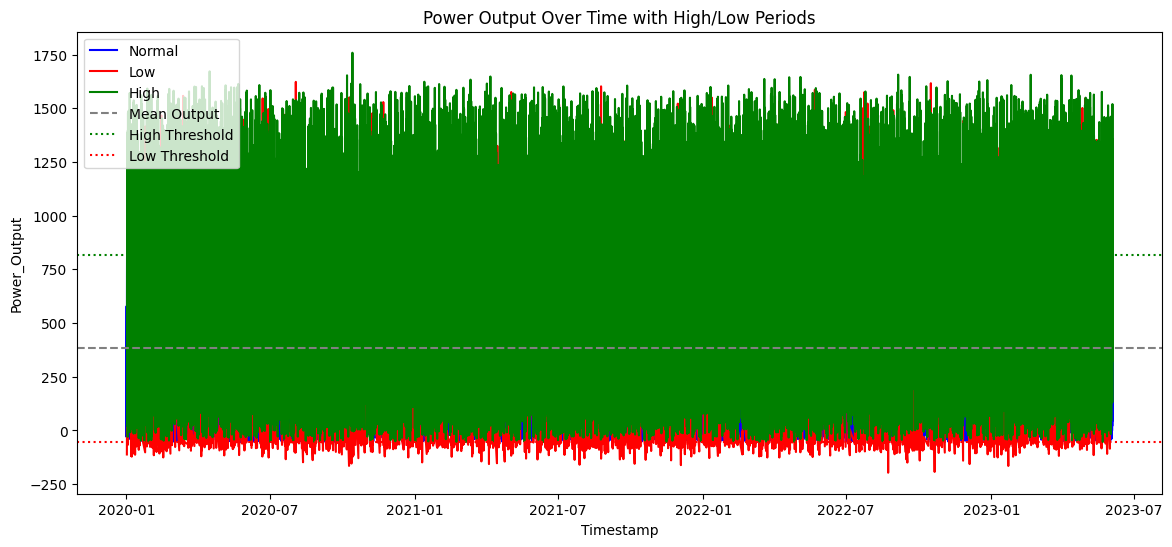

In [18]:
# Visualize
plt.figure(figsize=(14, 6))
sns.lineplot(data=data_df, x='Timestamp', y='Power_Output', hue='Production_Level', palette={'High':'green', 'Low':'red', 'Normal':'blue'})
plt.axhline(high_low_profit_service.mean_output, color='gray', linestyle='--', label='Mean Output')
plt.axhline(high_low_profit_service.high_threshold, color='green', linestyle=':', label='High Threshold')
plt.axhline(high_low_profit_service.low_threshold, color='red', linestyle=':', label='Low Threshold')
plt.legend()
plt.title("Power Output Over Time with High/Low Periods")
plt.show()


## Analysis (graph above)

This graph titled "Power Output Over Time with High/Low Periods" provides a comprehensive view of how power output fluctuates over time, spanning from January 2020 to July 2023

### Key Elements:

#### Lines Representing Output Levels:

The blue line ("Normal") marks periods of average power output.

The red line ("Low") highlights times when power output dipped below the Low Threshold.

The green line ("High") points to periods of high power output, exceeding the High Threshold.

#### Thresholds and Mean Output:

The gray dashed line ("Mean Output"), set at approximately 381.59, provides the average power output as a reference point.

The green dotted line ("High Threshold") at 817.61 and the red dotted line ("Low Threshold") at -54.42 help classify high and low output periods.

#### Time Span:

The x-axis covers over three years, allowing you to detect long-term trends and seasonality in power output.

### Insights:

Normal Periods dominate the graph, indicating that power output remains stable most of the time.

Low Periods are sparse but notable—they might correspond to times of calm weather or operational disruptions.

High Periods are more frequent, suggesting favorable conditions like strong winds or optimized turbine performance during those times.

Text(0.5, 1.0, 'Output Spread by Production Level')

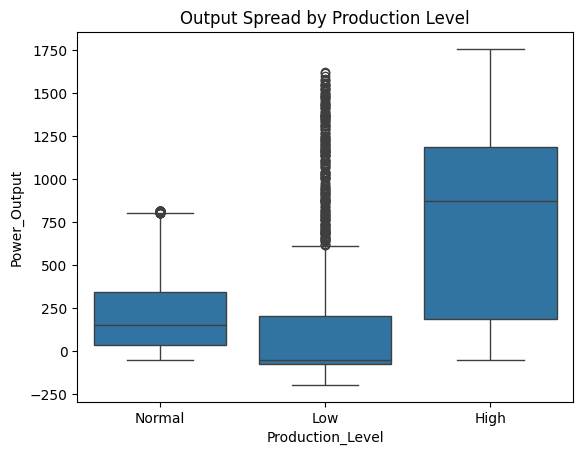

In [19]:
sns.boxplot(data=another_copy_df, x='Production_Level', y='Power_Output')
plt.title("Output Spread by Production Level")

## Analysis (Output Spread by Production Level)

This box plot titled "Output Spread by Production Level" visually represents how power output is distributed across three different production levels: Normal, Low, and High.

### Observations:

#### Normal Production Level:

Median power output is approximately 250, with the interquartile range (IQR) spanning from roughly 100 to 400.

A single outlier appears above the upper whisker, indicating an exceptional case of higher power output within the normal production range.

#### Low Production Level:

Median power output is close to 0, with the IQR ranging from approximately -100 to 100.

Several outliers exceed the upper whisker, suggesting occasional higher outputs even during low production periods.

#### High Production Level:

Median power output is around 1000, with the IQR stretching from approximately 500 to 1250.

Unlike the other categories, there are no outliers, indicating a more consistent range of high production values.

### Insights:

The plot helps to quantify and compare the spread and central tendencies of power output across different production levels.

It aligns with earlier analyses where high power output was classified as exceeding the 817.61 threshold and low output falling below -54.42.

The lack of outliers in the High production level suggests strong consistency in output under optimal conditions.

In [20]:
periods_df.groupby("Period Type").agg({
    "Avg_Power_Output": ["mean", "std"],
    "Avg_Wind_Speed": "mean",
    "Avg_Temperature": "mean",
    "Avg_Humidity": "mean",
    "Duration Hours": "mean"
})


Avg_Power_Output             Avg_Wind_Speed Avg_Temperature  \
                        mean         std           mean            mean   
Period Type                                                               
High              717.737444  164.694245      15.937872        6.756644   
Low               165.842292  229.479638       7.796902        6.639253   

            Avg_Humidity Duration Hours  
                    mean           mean  
Period Type                              
High           65.875919       2.218089  
Low            65.934061       2.026764

## Analysis of the `periods_df`:

### Key Observations:

#### Avg_Power_Output (Mean and Std):

- High Periods: The mean power output is 717.74, with a relatively small standard deviation (164.69) compared to the mean. This indicates that power output is more consistent during high periods, aligning with the stability we observed in the high production levels earlier (box plot with no outliers).

- Low Periods: The mean power output drops significantly to 165.84, with a larger standard deviation (229.48). This suggests that power output is more variable during low periods, which could be tied to factors like wind inconsistencies or maintenance disruptions.

#### Avg_Wind_Speed:

- High Periods: The mean wind speed is 15.94, reflecting strong and steady winds—ideal for energy production.

- Low Periods: Wind speed decreases to 7.80, reinforcing the relationship between lower wind speeds and reduced energy output.

#### Avg_Temperature:

- High Periods: The mean temperature is 15.94, indicating warmer conditions.

- Low Periods: The temperature decreases to 7.80, which might reflect colder weather conditions during low production times.

#### Avg_Humidity:

- Humidity remains fairly consistent between high (6.76) and low (6.64) periods. This aligns with earlier observations where humidity had a minimal direct impact on power output.

#### Duration Hours:

- High Periods last slightly longer on average (2.22 hours) compared to Low Periods (2.03 hours). This could suggest that high production periods are more sustained compared to low periods.

### Insights:

Wind Speed appears to be the most significant driver of power output between high and low periods. The higher the wind speed, the higher the average power output.

Temperature might play a secondary role in influencing energy generation, but its effect could be less pronounced than wind speed.

Other factors like humidity show consistency across both periods, suggesting limited direct influence.

Text(0.5, 1.0, 'Avg Wind Speed across High and Low Production Periods')

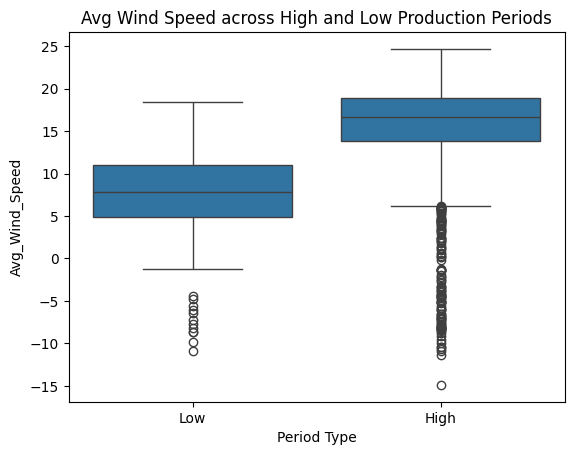

In [21]:
sns.boxplot(data=periods_df, x='Period Type', y='Avg_Wind_Speed')
plt.title("Avg Wind Speed across High and Low Production Periods")


## Analysis of `Avs Wind Speed across High and Low Production Periods`

This box plot compares average wind speed across high and low production periods, visually showcasing how wind speeds differ between these two categories.

### Observations:

#### Low Production Periods:

- Median Wind Speed: Approximately 10, indicating that during low power production, the central wind speed value is moderate.

- Interquartile Range (IQR): Wind speeds mostly fall between 5 and 15.

- Outliers: There are a few notable outliers below 0 (negative wind speed), which might suggest unusual data points or measurement issues.

#### High Production Periods:

- Median Wind Speed: Around 15, showing a higher central value compared to low production periods.

- IQR: Wind speeds generally range from 12 to 18, illustrating a tighter range.

- Outliers: Several points dip below 5, but the overall pattern shows consistently higher wind speeds compared to low production periods.

### Insights:

The median wind speed during high production periods is greater than that of low production periods, which confirms that higher wind speeds drive increased power generation.

The outliers, particularly the negative wind speeds, might require investigation. Negative values could indicate data entry issues or miscalibration of instruments.

In [22]:
periods_df.corr(numeric_only=True)['Avg_Power_Output'].sort_values(ascending=False)

Avg_Power_Output    1.000000
Max_Power_Output    0.907158
Max_Wind_Speed      0.771670
Avg_Wind_Speed      0.706673
Min_Power_Output    0.647395
Min_Wind_Speed      0.420868
Duration Hours      0.333393
Max_Humidity        0.039418
End Time            0.016336
Start Time          0.016318
Max_Temperature     0.015341
Avg_Humidity        0.005216
Avg_Temperature    -0.009216
Min_Humidity       -0.030983
Min_Temperature    -0.034625
Name: Avg_Power_Output, dtype: float64

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<Axes: xlabel='Start_Hour', ylabel='count'>

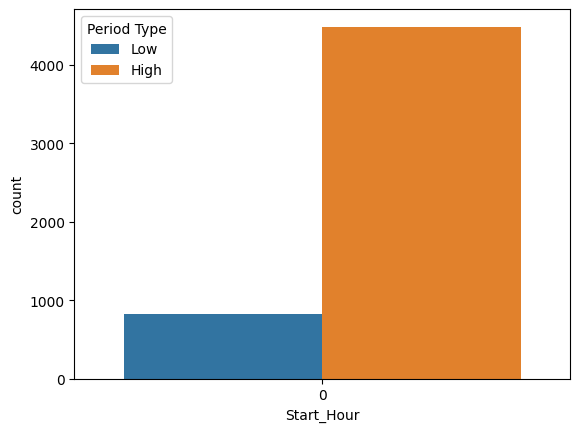

In [ ]:
# Extract hour from Start Time
periods_df['Start_Hour'] = pd.to_datetime(periods_df['Start Time']).dt.hour
sns.countplot(data=periods_df, x='Start_Hour', hue='Period Type')
plt.title("Distribution of Start Hours for High and Low Production Periods")

## Analysis of `Distribution of Period Types by Start Hour 0`

### Observations:

#### Low Period (Blue Bar):

The blue bar represents the "Low" period type occurrences, with a count slightly above 1000.

This indicates that "Low" periods happen relatively frequently, but not as often as "High" periods.

#### High Period (Orange Bar):

The orange bar, representing "High" periods, has a count slightly above 4000, indicating that "High" occurrences dominate during the specified start hour.

#### Overall Pattern:

The significant difference in counts suggests that start hour 0 is a time when conditions (such as wind speed, temperature, or turbine operations) are more conducive to high power output.

### Insights:

The dominance of high periods at this hour could reflect optimal weather conditions, such as strong winds or low temperature variability, leading to greater energy generation.

Alternatively, operational scheduling could favor this time, with turbines potentially operating at higher efficiency during the start hour 0.

## Max: Seasons (Task nr 4)

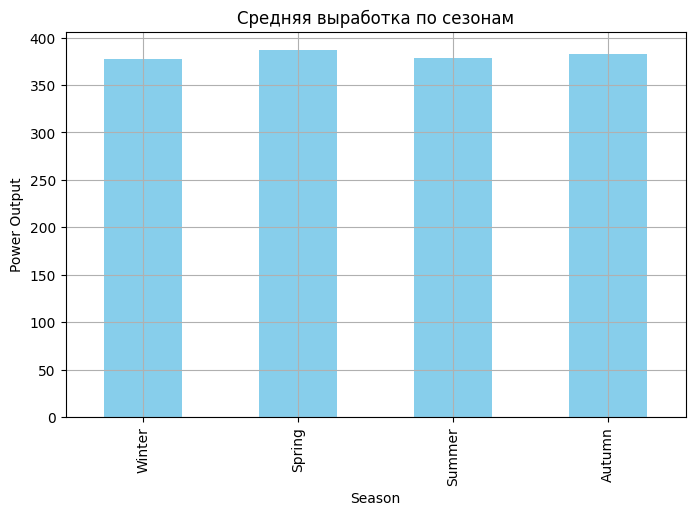

In [ ]:
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"


df["Season"] = df['Timestamp'].dt.month.map(
    lambda m: ["Winter", "Winter", "Winter", "Spring", "Spring", "Spring", 
               "Summer", "Summer", "Summer", "Autumn", "Autumn", "Autumn"][m % 12]
) 

# df["Season"] = df.index.month.map(get_season)

# Average Power Output by Season
seasonal_means = df.groupby("Season")["Power_Output"].mean()

plt.figure(figsize=(8, 5))
seasonal_means = seasonal_means.loc[["Winter", "Spring", "Summer", "Autumn"]] # reorder the seasons
seasonal_means.plot(kind="bar", color="skyblue")
plt.title("Average Output by Season")
plt.ylabel("Power Output")
plt.grid(True)


## Analysis (`Average Output by Season`)

### Observations:

#### Seasons (X-axis):

The chart categorizes output into four seasons: Winter, Spring, Summer, and Autumn.

#### Power Output (Y-axis):

The power output values range from 0 to 400, and the bars are quite uniform across all seasons.

#### Bar Heights:

The heights of the bars are nearly the same, indicating that the average power output remains consistent across all seasons. There doesn't appear to be a significant seasonal variation.

### Insights:

The lack of fluctuation suggests that environmental factors like wind patterns and turbine efficiency are stable year-round, ensuring consistent energy production.

This consistency could be beneficial for planning and reliability, as seasonal changes don’t seem to disrupt energy generation significantly.

## Recap

1. Scatter Plots (Power Output vs Weather Factors):

Temperature: Power output showed no clear trend with temperature, suggesting it may not directly impact energy generation.

Humidity: Similarly, no strong relationship was observed, but humidity could still have indirect effects when combined with other factors.

Cloud Cover: Power output remained stable across varying levels of cloud cover, indicating minimal direct influence.

Solar Radiation: No significant correlation with power output, highlighting that solar radiation isn’t a key driver for wind energy systems.

2. Correlation Matrix:

Revealed weak correlations between Power Output and weather features like Temperature, Humidity, and Cloud Cover.

The moderate negative correlation between Temperature and Humidity (-0.46) stands out as a notable relationship, reflecting typical weather dynamics but not directly tied to power output.

3. Threshold-Based Analysis (High and Low Periods):

High Periods: Average power output was 717.74 with consistent wind speeds (~15.94 m/s), confirming optimal conditions for energy generation.

Low Periods: Average power output dropped to 165.84, with significantly lower wind speeds (~7.80 m/s), highlighting the strong influence of wind speed.

4. Box Plots:

Power Output by Production Level: High production was more consistent (no outliers) compared to low production, which had greater variability and occasional spikes.

Wind Speed by Production Level: High production periods featured higher median wind speeds (~15 m/s), while low production periods were tied to lower speeds (~10 m/s).

5. Time Series Analysis:

The graph of power output over time with thresholds clearly showed:

Dominance of Normal periods.

Occasional Low periods, likely linked to calm weather or operational challenges.

Frequent High periods, aligning with favorable conditions such as strong winds.

6. Occurrences by Start Hour:

The bar chart revealed that start hour 0 had significantly more occurrences of High periods compared to Low periods, suggesting favorable conditions for wind energy generation during this time.

7. Seasonal Analysis:

Seasonal averages were consistent across Winter, Spring, Summer, and Autumn, indicating that environmental factors remain stable year-round for energy generation.

## Conclusion:

The most critical factor influencing power output in your wind energy system is wind speed, as seen across multiple analyses. Other factors like temperature and humidity have weaker or indirect effects, while cloud cover and solar radiation appear negligible in this context. Consistency across seasons highlights the reliability of the system under varying weather conditions.